In [6]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

In [7]:
!pip install -U scikit-learn==1.0.1
#conda install -c anaconda scikit-learn==1.0.1

zsh:1: command not found: pip


In [8]:
import sklearn
sklearn.__version__

'1.1.1'

---
# Unsupervised learning

In [9]:
# Toy dataset
rng = np.random.RandomState(1)
X = np.dot(rng.rand(2, 2), rng.randn(2, 200)).T

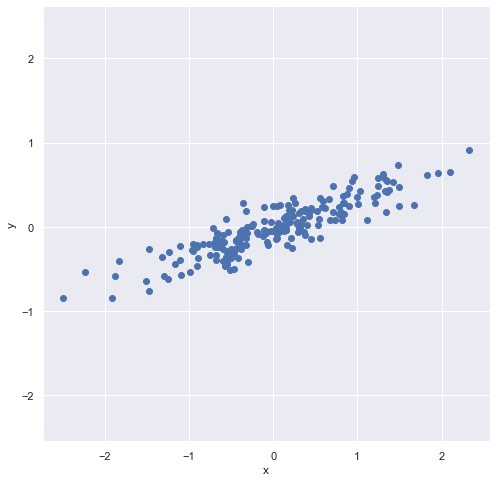

In [10]:
plt.figure(figsize=(8, 8))
plt.scatter(X[:, 0], X[:, 1])
plt.axis('equal');
plt.xlabel('x')
plt.ylabel('y');

In unsupervised learning, rather than attempting to predict the labels from the data (observations), the problem consists in learning the relationships within the data.
The assumption is that the data have common patterns that drive the actual phenomena.

In the above plot, it is clear that there is a nearly linear relationship between the x and y variables.
With unsupervised techniques, we want to find such relationships in the data.

Unsupervised learning techniques are utilized for three main tasks:

- **Association Rules**: it is a rule-based method for finding relationships between variables in a given dataset. These methods are frequently used for market basket analysis, allowing companies to better understand relationships between different products.
- **Dimensionality reduction**: is a technique used when the number of features, or dimensions, in a given dataset is too high. It reduces the number of data inputs to a manageable size while also preserving the integrity of the dataset as much as possible.
- **Clustering**: it is a data mining technique which groups unlabeled data based on their similarities or differences.

-----
# Dimensionality reduction
## PCA

**Notes**:

- PCA is a linear unsupervised technique.
- The underlying hypothesis is that dimensions with high variance bring much of the information.

In [12]:
from sklearn.decomposition import PCA
#help(PCA)

In [13]:
pca = PCA(n_components=2)
pca.fit(X)

print('Components:\n', pca.components_)
print('\nExplained variance:\n', pca.explained_variance_)

Components:
 [[-0.94446029 -0.32862557]
 [-0.32862557  0.94446029]]

Explained variance:
 [0.7625315 0.0184779]


To see what these numbers mean, let's visualize them as vectors over the input data.
We are going to use the "components" to define the direction of the vector, and the "explained variance" to define the squared-length of the vector.

In [14]:
def draw_vector(v0, v1, ax=None):
    """
    
    Args:
        v0: (float)
            X coordinate.
        v1: (float)
            Y coordinate.
        ax: (plt.axis, default plt.gca)
            Axis where the vector is drawn.
    """
    ax = ax or plt.gca()
    arrowprops = dict(
        arrowstyle = '->',
        linewidth = 2,
        shrinkA = 0, 
        shrinkB = 0,
        color = 'black'
    )
    ax.annotate('', v1, v0, arrowprops=arrowprops)

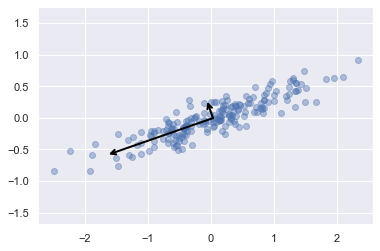

In [15]:
# plot data
plt.scatter(X[:, 0], X[:, 1], alpha=0.4)

for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 2 * np.sqrt(length)
    draw_vector(pca.mean_, pca.mean_ + v)
    
plt.axis('equal');

This transformation from data axes to principal axes is an affine transformation, which basically means it is composed of a translation, rotation, and uniform scaling.

While this algorithm to find principal components may seem like just a mathematical curiosity, it turns out to have very far-reaching applications in the world of machine learning and data exploration.

### Ex1: plot the eigenvectors

How will be placed the eigenvectors (principal components) in this dataset?

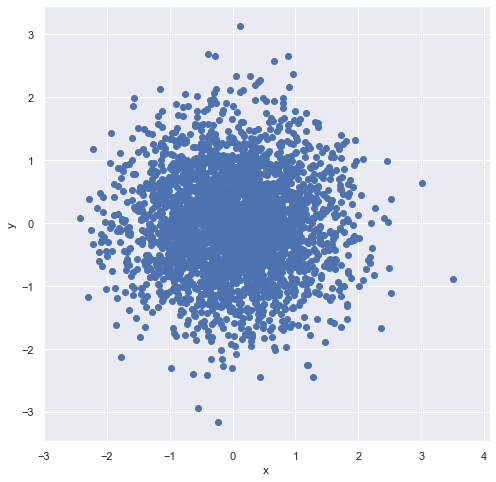

In [10]:
X = np.random.normal(loc=(0, 0), scale=(0.8, 0.8), size=(3000, 2))

plt.figure(figsize=(8, 8))
plt.scatter(X[:, 0], X[:, 1])
plt.axis('equal');
plt.xlabel('x')
plt.ylabel('y');

## PCA for dimensionality reduction

Using PCA for dimensionality reduction involves **zeroing out one or more of the smallest principal components**, resulting in a lower-dimensional projection of the data that preserves the maximal data variance.

In [11]:
from sklearn.datasets import load_digits

digits = load_digits()
print(digits['DESCR'])

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

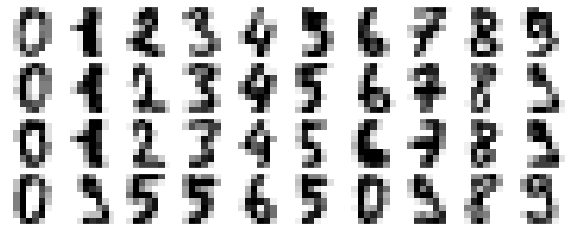

In [12]:
def plot_digits(data):
    fig, axes = plt.subplots(4, 10, 
                             figsize=(10, 4),
                             subplot_kw={'xticks':[], 'yticks':[]},
                             gridspec_kw=dict(hspace=0.1, wspace=0.1))
    for i, ax in enumerate(axes.flat):
        ax.imshow(data[i].reshape(8, 8),
                  cmap='binary', 
                  interpolation='nearest',
                  clim=(0, 16))

plot_digits(digits.data)

In [13]:
# project from 64 to 2 dimensions
pca = PCA(2)  
projected = pca.fit_transform(digits.data)

print('Original shape:', digits.data.shape)
print('Reduced shape:',projected.shape)

Original shape: (1797, 64)
Reduced shape: (1797, 2)


/var/folders/_5/nz2sd3157zv650x21j02q3pr0000gn/T/ipykernel_96973/1966192417.py:10: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar()


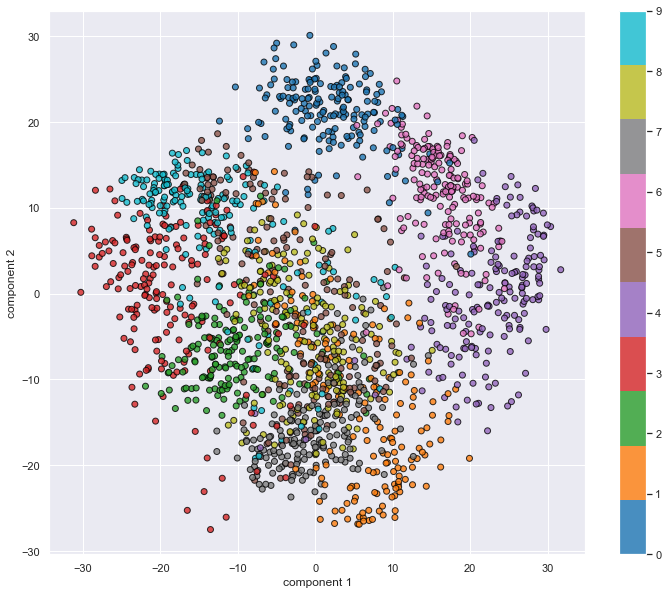

In [24]:
plt.figure(figsize=(12, 10))
sc = plt.scatter(projected[:, 0], projected[:, 1],
                c=digits.target, 
                edgecolor='black', 
                alpha=0.8,
                cmap=plt.cm.get_cmap('tab10', 10))

plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar()
plt.show()

### How many components?

The usefulness of the dimensionality reduction may not be entirely apparent in only two dimensions, but becomes much more clear when looking at high-dimensional data.

A vital part of using PCA in practice is the ability to estimate how many components are needed to describe the data. This can be determined by looking at the cumulative explained variance ratio as a function of the number of components

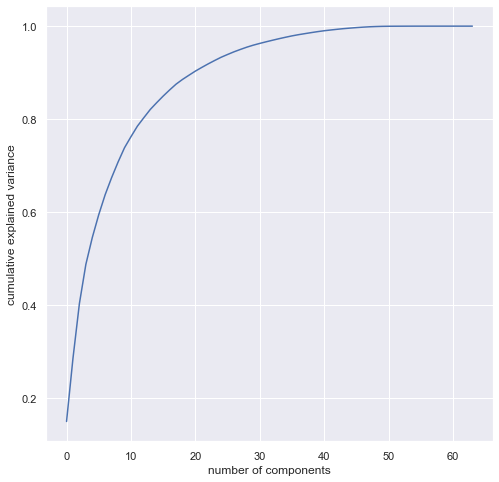

In [25]:
pca = PCA().fit(digits.data)

plt.figure(figsize=(8, 8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

This curve quantifies how much of the total, 64-dimensional variance is contained within the first N components. 

For example, we see that with the digits the first 10 components contain approximately 75% of the variance, while you need around 50 components to describe close to 100% of the variance.

> Now you should be able to understand why the previous scatter plot is so messy.

**Final remark**:

PCA is useful for visualizing data when few components "explain" most of the dataset variance. <br>
Always rememeber to take a look at the explained variance!

Finally, PCA is a useful preprocessing tool for avoinding overfitting in supervised models.
> Can you guess why?

## t-SNE

t-SNE is a **nonlinear technique** mainly used to visualize data in 2D.
Due to it nonlinear nature, it is able to better approximate nonlinear relationships in the data.

For example, if we try to visualize the digits dataset in 2D with t-SNE, we end up with something really interesting.

In [26]:
from sklearn.manifold import TSNE
#help(TSNE)

In [27]:
tsne = TSNE(n_components=2, 
            #init='pca',
            init='random', 
            verbose=1, 
            perplexity=30, 
            n_iter=1000)
projected = tsne.fit_transform(digits.data.astype(np.float32))

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 1797 samples in 0.000s...
[t-SNE] Computed neighbors for 1797 samples in 0.112s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1797
[t-SNE] Computed conditional probabilities for sample 1797 / 1797
[t-SNE] Mean sigma: 11.585657
[t-SNE] KL divergence after 250 iterations with early exaggeration: 61.757278
[t-SNE] KL divergence after 1000 iterations: 0.743751


/var/folders/_5/nz2sd3157zv650x21j02q3pr0000gn/T/ipykernel_96973/318669350.py:10: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar();


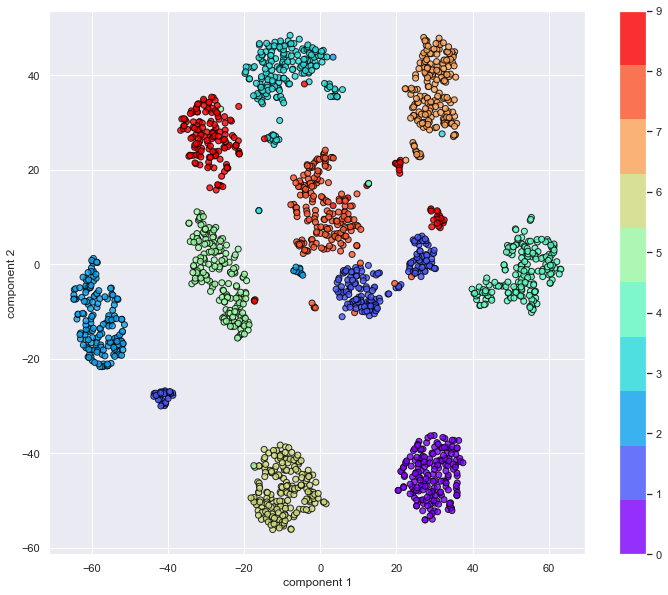

In [28]:
plt.figure(figsize=(12, 10))
plt.scatter(projected[:, 0], projected[:, 1],
            c=digits.target, 
            edgecolor='black', 
            alpha=0.8,
            cmap=plt.cm.get_cmap('rainbow', 10))

plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();

### Hyperparameters Tuning

Hyperparameter Tuning is the problem of choosing a set of optimal hyperparameters for an algorithm.
Tuning finds a tuple of hyperparameters that yields a model which minimizes a predefined loss function on validation data.
Cross-validation is often used to estimate the generalization performance (the expected loss on different validation set).

> In this example, we are going to use a slightly different apporach since t-SNE is normally used for plotting.

**Perplexity**: The perplexity is related to the number of nearest neighbors that is used in other manifold learning algorithms. Larger datasets usually require a larger perplexity. Consider selecting a value between 5 and 50

Perplexity 2
Perplexity 10
Perplexity 30
Perplexity 50
Perplexity 100
Perplexity 300


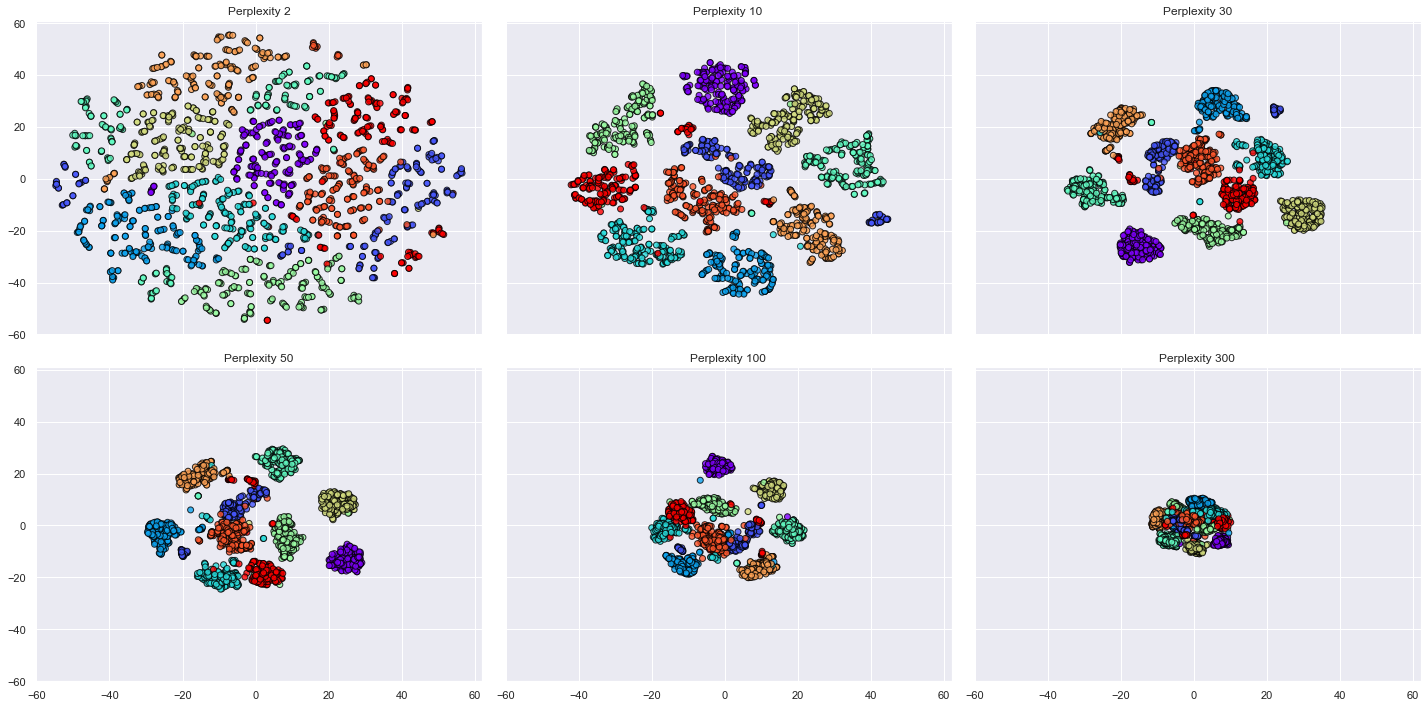

In [29]:
perplexities = [2, 10, 30, 50, 100, 300]
fig, axs = plt.subplots(2, len(perplexities) // 2, figsize=(20, 10), sharex=True, sharey=True)

for ax, perp in zip(axs.flatten(), perplexities):
    print(f'Perplexity {perp}')
    tsne = TSNE(n_components=2, 
                init='random',
                learning_rate='auto', 
                verbose=0, 
                perplexity=perp, 
                n_iter=500)
    projected = tsne.fit_transform(digits.data)
    
    # Plot
    ax.scatter(projected[:, 0], 
               projected[:, 1],
               c=digits.target, 
               edgecolor='black', 
               alpha=0.8,
               cmap=plt.cm.get_cmap('rainbow', 10))
    ax.set_title(f'Perplexity {perp}')

plt.tight_layout()

**n_iter**: Maximum number of iterations for the optimization. Should be at least 250.

Num steps 250
Num steps 350
Num steps 500
Num steps 1000
Num steps 1500
Num steps 2000


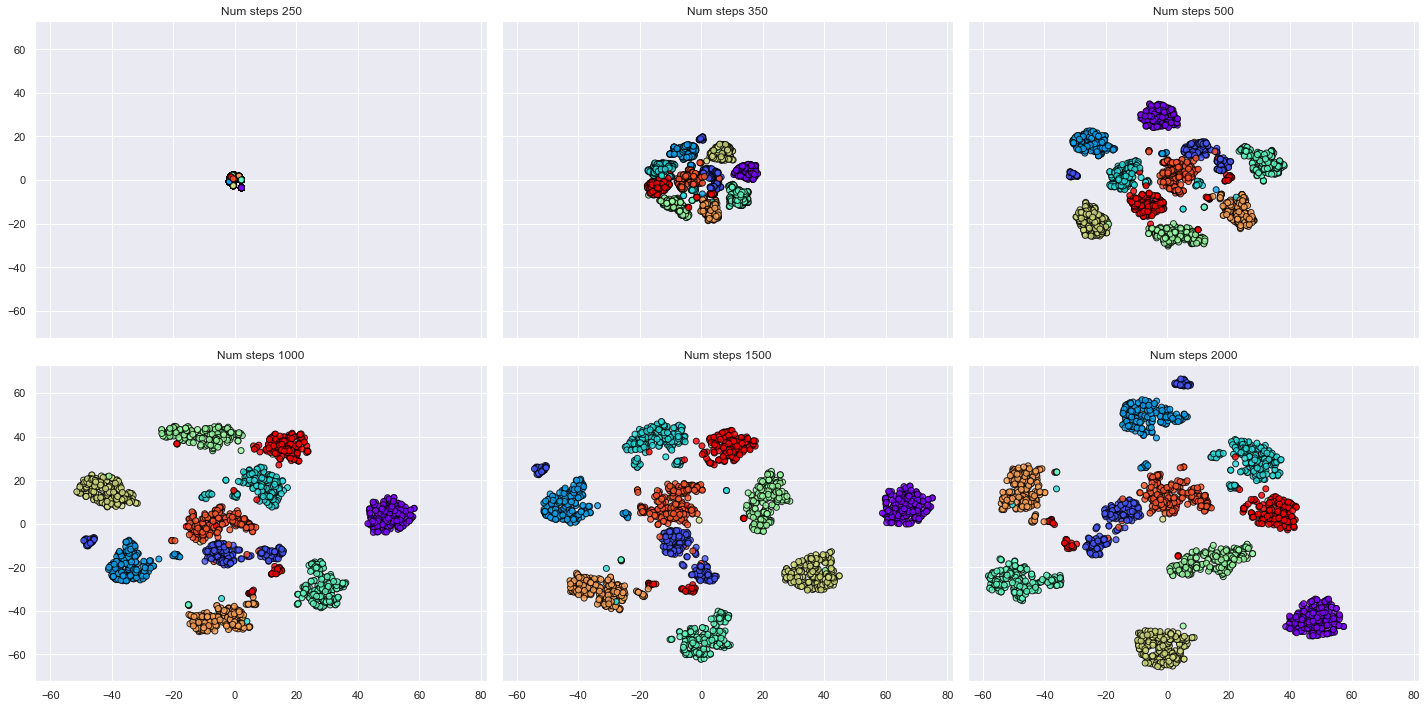

In [30]:
n_steps = [250, 350, 500, 1000, 1500, 2000]
fig, axs = plt.subplots(2, len(n_steps) // 2, figsize=(20, 10), sharex=True, sharey=True)

for ax, steps in zip(axs.flatten(), n_steps):
    print(f'Num steps {steps}')
    tsne = TSNE(n_components=2, 
                init='random',
                learning_rate='auto', 
                verbose=0, 
                perplexity=30, 
                n_iter=steps)
    projected = tsne.fit_transform(digits.data)
    
    # Plot
    ax.scatter(projected[:, 0], 
               projected[:, 1],
               c=digits.target, 
               edgecolor='black', 
               alpha=0.8,
               cmap=plt.cm.get_cmap('rainbow', 10))
    ax.set_title(f'Num steps {steps}')

plt.tight_layout()

### Ex2: plot with PCA and t-SNE.

Use the following dataset and plot it in 2D with both PCA and t-SNE. <br>
Which is better?

In [31]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=4000, 
                  n_features=10,
                  centers=4,
                  cluster_std=[1, 5, 2, 4],
                  random_state=12345)

print('X shape:', X.shape)
print('y shape:', y.shape)

X shape: (4000, 10)
y shape: (4000,)


---
# Clustering

In [32]:
from sklearn.datasets import make_blobs

blobs, y = make_blobs(n_samples=1500,
                      n_features=5,
                      centers=5,
                      cluster_std=4,
                      random_state=799)

print('Dataset shape:', blobs.shape)
for label in np.unique(y):
    print(f'Num labels equals to {label} =', sum(y == label))

Dataset shape: (1500, 5)
Num labels equals to 0 = 300
Num labels equals to 1 = 300
Num labels equals to 2 = 300
Num labels equals to 3 = 300
Num labels equals to 4 = 300


In [33]:
from sklearn.manifold import TSNE
projected = TSNE(
    n_components=2, 
    init='pca',
    learning_rate='auto', 
    verbose=0, 
    perplexity=30, 
    n_iter=1000,
    random_state=12345
).fit_transform(blobs)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:991: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


In [34]:
def plot_compare(x, y, y_pred, title):
    """ Helper """
    plt.figure(figsize=(14, 6))
    plt.subplot(121)
    plt.scatter(x[:, 0], x[:, 1],
                c=y_pred, 
                edgecolor='black', 
                alpha=0.8,
                cmap=plt.cm.get_cmap('Accent', 5))
    plt.title(title)
    plt.xlabel('component 1')
    plt.ylabel('component 2');

    plt.subplot(122)
    plt.scatter(x[:, 0], x[:, 1],
                c=y, 
                edgecolor='black', 
                alpha=0.8,
                cmap=plt.cm.get_cmap('Accent', 5))
    plt.title('True clusters')
    plt.xlabel('component 1')
    plt.ylabel('component 2');

----
## K-means

In [35]:
from sklearn.cluster import KMeans
#help(KMeans)

In [36]:
kmeans = KMeans(n_clusters=5,
                max_iter=500,
                verbose=1).fit(blobs)

print(f'Inertia = {kmeans.inertia_:.5f}')

Initialization complete
Iteration 0, inertia 216988.03141688026.
Iteration 1, inertia 154875.27022915817.
Iteration 2, inertia 134233.5278569579.
Iteration 3, inertia 121934.76705145297.
Iteration 4, inertia 120894.47954608915.
Iteration 5, inertia 120858.43702885433.
Iteration 6, inertia 120856.26822251505.
Converged at iteration 6: strict convergence.
Initialization complete
Iteration 0, inertia 231328.11504444247.
Iteration 1, inertia 135636.13297003522.
Iteration 2, inertia 121230.9088769393.
Iteration 3, inertia 120896.53635663274.
Iteration 4, inertia 120863.17879359372.
Iteration 5, inertia 120858.79980804899.
Converged at iteration 5: strict convergence.
Initialization complete
Iteration 0, inertia 216661.8647673755.
Iteration 1, inertia 136170.48731865763.
Iteration 2, inertia 121433.85290181224.
Iteration 3, inertia 120880.36598712445.
Iteration 4, inertia 120857.56999480017.
Converged at iteration 4: center shift 0.004134173729508376 within tolerance 0.00478453522895038.
Ini

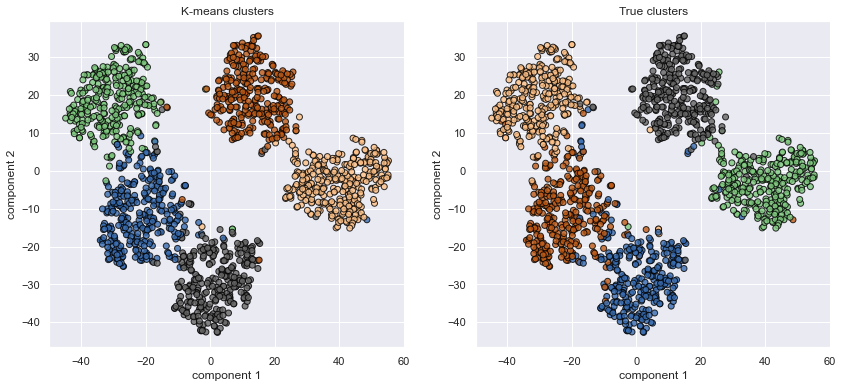

In [37]:
plot_compare(projected, y, kmeans.labels_, 'K-means clusters')

In [38]:
def find_wrong(labels, y):
    """
    
    Args:
        labels: labels given by the clustering algorithm.
        y: true labels.
    """
    mapped_labels = labels.copy()
    
    for label in np.unique(labels):
        vals, counts = np.unique(y[labels == label], return_counts=True)
        correct_cluster = vals[np.argmax(counts)]
        mapped_labels[labels == label] = correct_cluster
    
    return y != mapped_labels  

Number of wrong points 60/1500


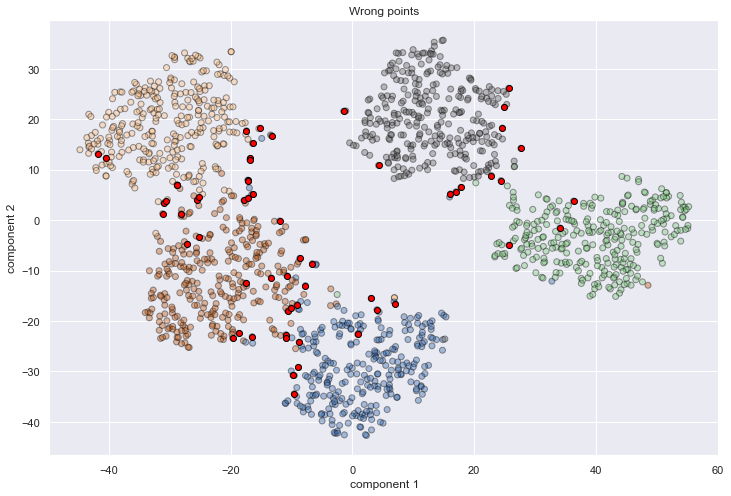

In [39]:
plt.figure(figsize=(12, 8))
plt.scatter(projected[:, 0], projected[:, 1],
            c=y, 
            edgecolor='black', 
            alpha=0.4,
            cmap=plt.cm.get_cmap('Accent', 5))

wrong = find_wrong(kmeans.labels_, y)
print(f'Number of wrong points {sum(wrong)}/{len(y)}')
plt.scatter(projected[wrong, 0], projected[wrong, 1],
            c='red', 
            edgecolor='black', 
            alpha=1)

plt.title('Wrong points')
plt.xlabel('component 1')
plt.ylabel('component 2');

### When does K-means fail?

- Differente varaince
- Unevenly sized clusters
- Anisotropicly distributed cluster
- Wrong number of clusters

In [40]:
random_state = 12345

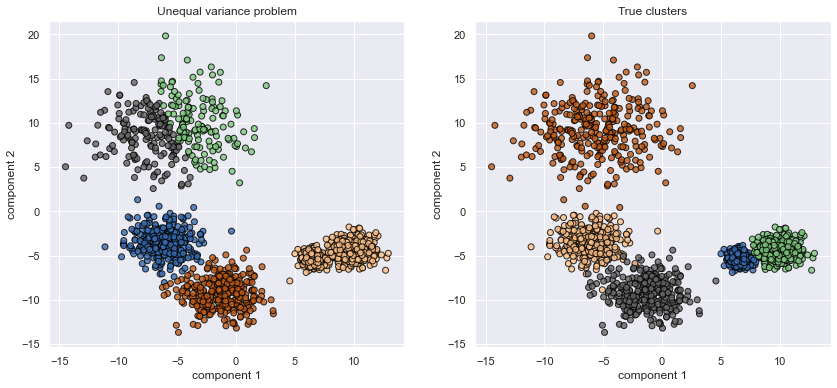

In [41]:
# Different variance
X_varied, y_varied = make_blobs(
    n_samples=1500,
    n_features=2,
    centers=5,
    cluster_std=[1.0, 1.5, 0.5, 3, 1.8],
    random_state=799
)
y_pred = KMeans(n_clusters=5, 
                random_state=random_state).fit_predict(X_varied)

plot_compare(X_varied, y_varied, y_pred, 'Unequal variance problem')

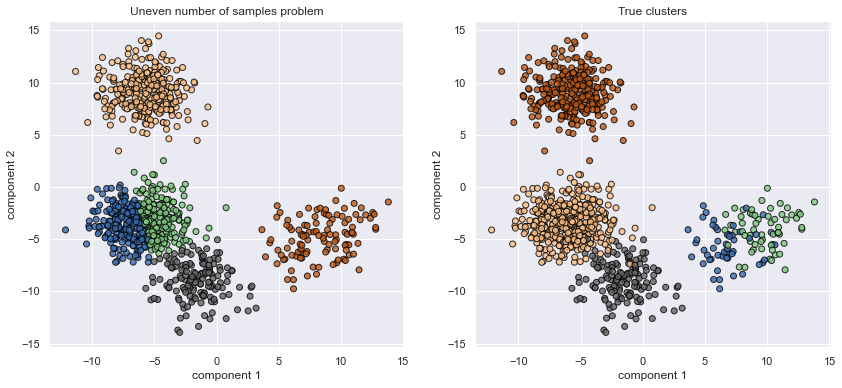

In [42]:
# Unevenly sized 
X_uneven, y_uneven = make_blobs(
    n_samples=[60, 400, 50, 300, 150],
    n_features=2,
    cluster_std=1.8,
    random_state=799
)
y_pred = KMeans(n_clusters=5, 
                random_state=random_state).fit_predict(X_uneven)

plot_compare(X_uneven, y_uneven, y_pred, 'Uneven number of samples problem')

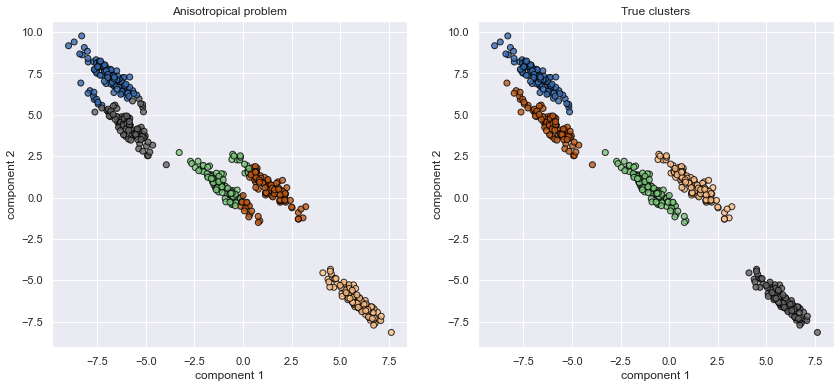

In [43]:
# Anisotropical clusters
X_aniso, y_aniso = make_blobs(
    n_samples=500,
    n_features=2,
    centers=5,
    cluster_std=1,
    random_state=899
)
transformation = [[0.70834549, -0.53667341], [-0.35887718, 0.65253229]]
X_aniso = np.dot(X_aniso, transformation)
y_pred = KMeans(n_clusters=5, 
                random_state=random_state).fit_predict(X_aniso)

plot_compare(X_aniso, y_aniso, y_pred, 'Anisotropical problem')

### How many clusters?

- The **elbow method** measures how compact the clusters are. It uses the inertia (sum of squared distances of samples to their closest cluster center) to judge the quality of clusters.
- The **silhouette** measures of how close each point in one cluster is to points in the neighboring clusters. Silhouette coefficients near +1 indicate that the sample is far away from the neighboring clusters. A value of 0 indicates that the sample is on or very close to the decision boundary between two neighboring clusters and negative values indicate that those samples might have been assigned to the wrong cluster.

> By using one (or both) of the previous metrics, we can run an algorithm several times and find the number of clusters that gives the best result.

In [44]:
inertias = []
clusters = []

for num_clusters in range(2, 10):
    kmeans_ = KMeans(n_clusters=num_clusters, 
                     max_iter=500, 
                     verbose=0, 
                     random_state=12345).fit(blobs)
    inertias.append(kmeans_.inertia_)
    clusters.append(num_clusters)
    
print(dict(zip(clusters, inertias)))

{2: 244183.97114526093, 3: 194882.97358209087, 4: 153680.121169951, 5: 120856.07428800053, 6: 116616.0333883829, 7: 112458.51072517259, 8: 108314.66955990595, 9: 104535.31603639637}


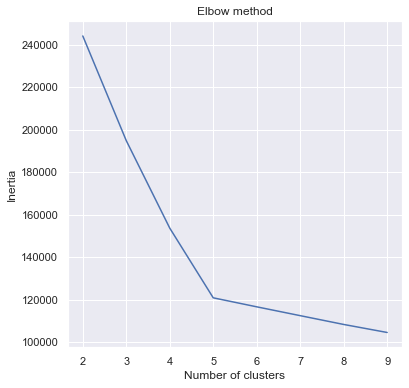

In [45]:
plt.figure(figsize=(6, 6))
plt.plot(clusters, inertias)

plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow method');

There’s a sweet spot where the Inertia curve starts to bend known as the **elbow point**. The x-value of this point is thought to be a reasonable trade-off between error and number of clusters.

---
## Agglomerative

In [46]:
from sklearn.cluster import AgglomerativeClustering
#help(AgglomerativeClustering)

In [47]:
agglo = AgglomerativeClustering(
    affinity='euclidean',
    linkage='ward',
    #distance_threshold=0.0001, n_clusters=None
    n_clusters=5
)
y_pred = agglo.fit_predict(blobs)

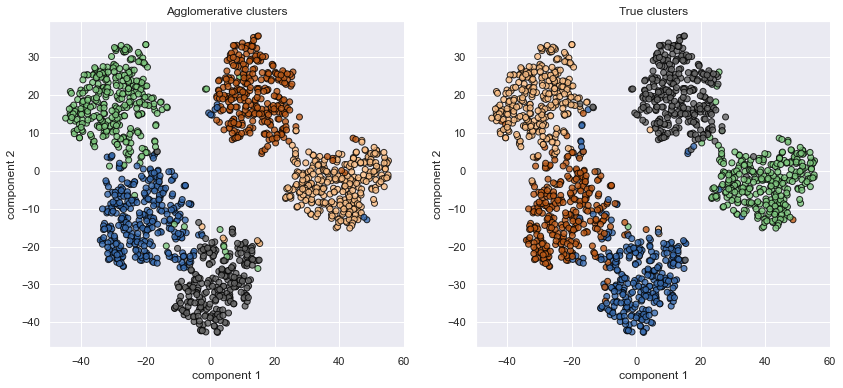

In [48]:
plot_compare(projected, y, y_pred, 'Agglomerative clusters')

Number of wrong points 127/1500


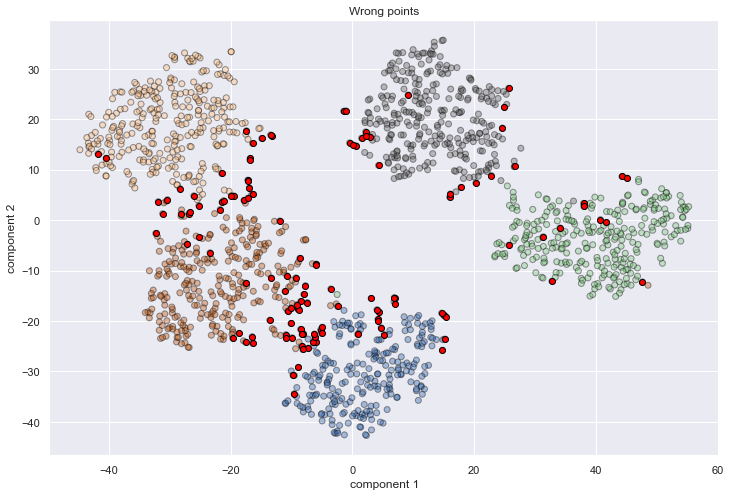

In [49]:
plt.figure(figsize=(12, 8))
plt.scatter(projected[:, 0], projected[:, 1],
            c=y, 
            edgecolor='black', 
            alpha=0.4,
            cmap=plt.cm.get_cmap('Accent', 5))

wrong = find_wrong(y_pred, y)
print(f'Number of wrong points {sum(wrong)}/{len(y)}')
plt.scatter(projected[wrong, 0], projected[wrong, 1],
            c='red', 
            edgecolor='black', 
            alpha=1)

plt.title('Wrong points')
plt.xlabel('component 1')
plt.ylabel('component 2');

### Ex3: compare the effect of different linkage metrics

Use different linkage metrics and see what happen to the clusters.

In [50]:
from sklearn.datasets import make_circles

x_circles, y_circles = make_circles(n_samples=1500, 
                                    factor=0.5, 
                                    noise=0.05)

## Clusters Validation

Evaluating the performance of a clustering algorithm is not as trivial as counting the number of errors in supervised classification.

Some evaluation metrics are:
- Rand index
- Mutual Information based scores
- Homogeneity, completeness and V-measure

In [51]:
# Take a look into the sklearn.metrics API
from sklearn import metrics